# Examen parcial 3 v2. (calculo numerico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 11.00am del 06.04.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio 1

Masa de una barra delgada en el intervalo [a, b] es dada por Integral:

$$ m =  \int_{a}^{b} \rho (x) \ dx $$

donde $\rho(x)$ es una función de densidad linear

<table><tr>
<td> <img src="rod.jpg" width="300" /> </td>
</tr></table>   


El archivo $\textbf{data_distance_density.csv}$ contiene dos columnas: la distancia un la barra ($ x $) y la densidad ($ \rho (x) $) de la barra como función del distancia.

* a) importar los datos usando pandas, graficar la densidad de la barra $\rho(x)$ vs $x$ (los gráficos deben tener etiquetas para el eje x y el eje y).

* b) calcular la masa de la barra mediante integración numérica

La masa de la barra es:  0.9999790207508321


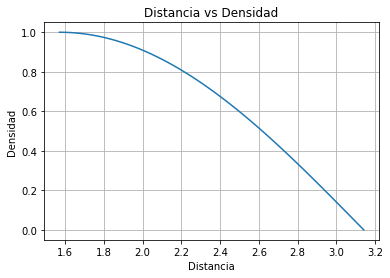

In [1]:
import numpy as np
import scipy.integrate as integrate
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
 
#A
df = pd.read_csv("data_distance_density.csv") #Importamos los datos
x=df.distance #extraemos los valores de la distancia
y=df.density #Extraemos los valores de la densidad
fig,ax=plt.subplots()
ax.plot(x, y)
ax.set_title("Distancia vs Densidad")
ax.set_xlabel('Distancia')
ax.set_ylabel('Densidad')
ax.grid(True)

#B
#Hacemos la intregral
I_trapz=integrate.trapz(y,x)
print("La masa de la barra es: ",I_trapz)

# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando Pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica y hace un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* d) encontrar Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

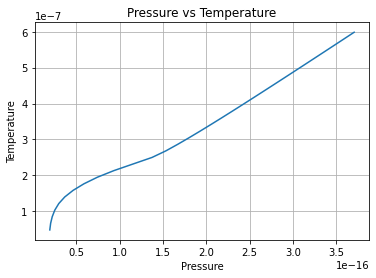

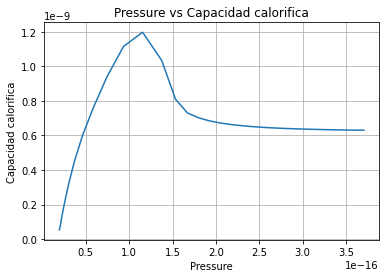

In [2]:
import numpy as np
import scipy.integrate as integrate
import pandas as pd
import matplotlib.pyplot as plt

#a
df=pd.read_csv("data_pressure_vs_temparature.csv") 
P=df.Pressure
T=df.Temperature

#b

fig,ax=plt.subplots()
ax.plot(P, T)
ax.set_title("Pressure vs Temperature")
ax.set_xlabel('Pressure')
ax.set_ylabel('Temperature')
ax.grid(True)

#C
y = np.gradient(P, T)
fig,ax=plt.subplots()
ax.plot(P, y)
ax.set_title("Pressure vs Capacidad calorifica")
ax.set_xlabel('Pressure')
ax.set_ylabel('Capacidad calorifica')
ax.grid(True)

#D


# Ejercicio 3.

Grafica la función:

$$ F_{a, b} = \int_0 ^{10} sin (ax) + cos (bx^ 2) \ \ dx $$

donde $ a $ es solo un número:

`a = 1`

y $ b $ es una numpy arrray, digamos:
 
`b = np.linspace (0,1,101)`

El gráfico $I$ vs $b$ deben tener etiquetas para eje `x` y eje `y`. 

Text(0, 0.5, 'Integral')

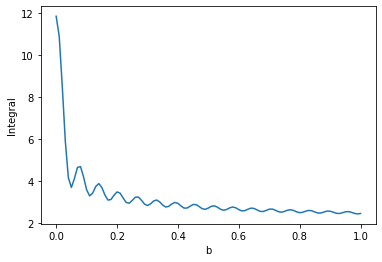

In [4]:
import numpy as np
import scipy.integrate as integrate
import pandas as pd
import matplotlib.pyplot as plt

def integrand2(x,a,b):
    return np.cos(b*x**2)+np.sin(a*x)
a=1
Is=[]
bs=np.linspace (0,1,101)
for b in bs:
    I,error = integrate.quad(integrand2, 0, 10, args=(a,b,))
    Is.append(I)
fig,ax = plt.subplots(1,1)
ax.plot(bs,Is)
ax.set_xlabel('b')
ax.set_ylabel('Integral')


## Ejercicio 4. Algebra linear.
#### Introducion:

En varios casos, sistema de equaciones diferentiales lineares
tipo 
$$\frac{d\textbf{x}}{dt}=\textbf{A}\textbf{x}$$
con solucion:
$$ \textbf{x}(t) = e^{t\textbf{A}} \textbf{C}$$

(donde $\textbf{x}$ es un vector, $\textbf{A}$ es matrix y $\textbf{C}$ es vector de condiciones iniciales)

se simplifica a calcular exponente de matriz: $e^{\textbf{A}t}$!!!!

$\textbf{Como ejercicio, calcule $e^{A}$}$ definido como:

$$e^A=Pe^DP^{-1}$$

donde $e^D$ es

$$e^D=
\begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & e^{\lambda_n} \\
\end{bmatrix}
$$

$P$ son eigenvectors y $P^{-1}$ es inversion de $P$

* a) Construye una function $\textbf{matrix_exp(A)}$ que acepta una matrix A como un argumento
* b) si matrix no es cuadrada: imprime "Matrix must be square" y sale la funcion usando: $\textbf{return}$
* c) si matrix es cuadrada ($\textbf{else:}$): calcule y imprime valor de $e^A$
* para verificar su resultado uno puede usar scipy.linalg.expm(A)

# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 2.5p):	2.5p

Exercise 2.
Solution + presentation of the results	            (max 2.5p):	2.5p
* plot has flipped axes

Exercise 3.
Solution + presentation of the results	            (max 2.5p):	2.5p

Exercise 4 
Solution + presentation of the results	            (max 2.5p):	0.0p




- Total:                                              (max 10.0p):   7.5p
```